**Visualize Time Series Data: Page Views**

---



In [ ]:
# install / import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib as mpl


In [ ]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data from file
# the data includes the number of page views each day on the freecodecamp.org forum from 2016-05-09 to 2019-12-03. 
# set the index to the date column.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [ ]:
# Preview the data

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [ ]:
# clean data
# remove outliers, filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

df = df[
        (df["value"] >= df["value"].quantile(0.025))
        & (df["value"] <= df["value"].quantile(0.975))]

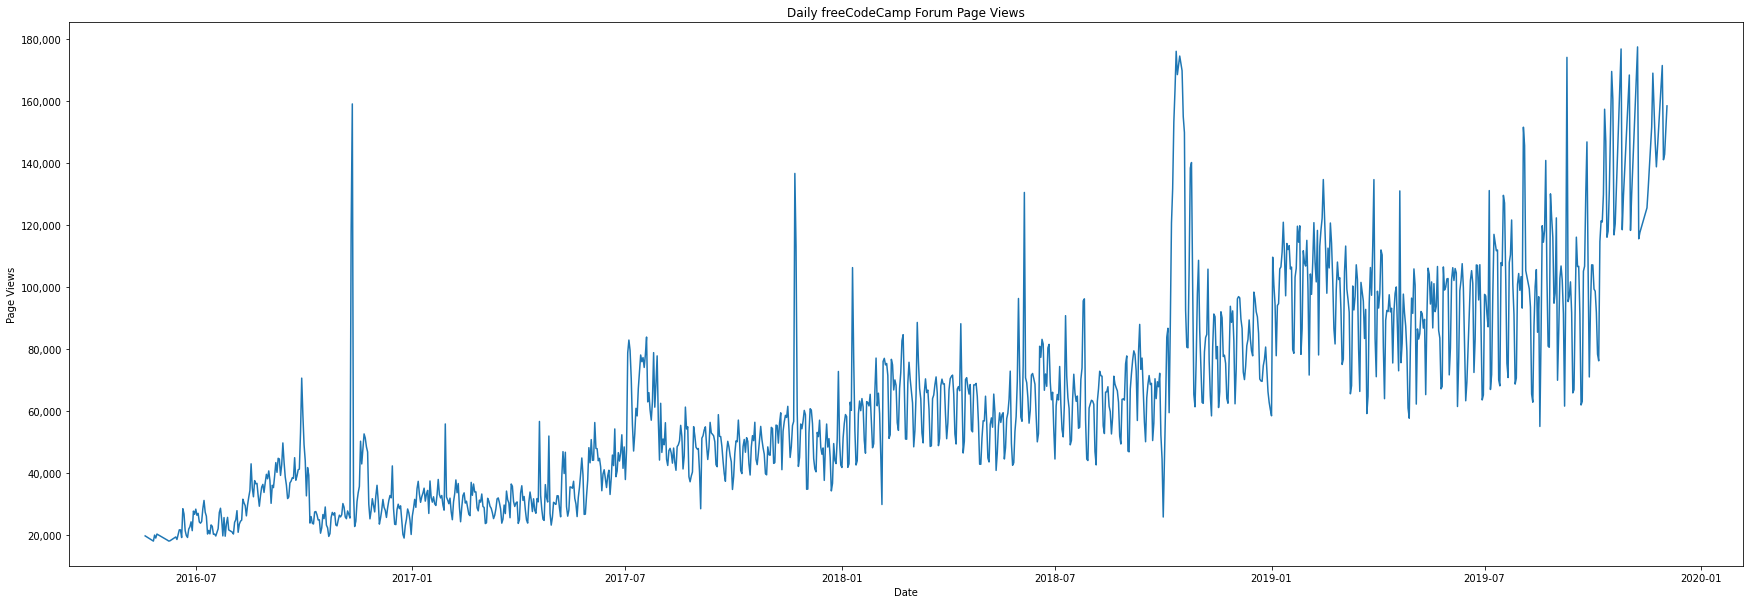

In [ ]:
# draw a line plot showing the daily freecodecamp forum page views

fig1, plot1 = plt.subplots(figsize=(30,10))
plot1.plot(df.index, df['value'])

plot1.set_title('Daily freeCodeCamp Forum Page Views')
plot1.set_xlabel('Date')
plot1.set_ylabel('Page Views')

plot1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
# draw a bar plot showing average daily page views for each month grouped by year

# get year and month
df['year'] = df.index.year
df['month'] = df.index.month


In [ ]:
# group data the by year and month

df_bar = df.pivot_table(index=['year'], columns='month', values=['value'], aggfunc={'value': np.mean})
df_bar.columns = df_bar.columns.map('{0[0]}_{0[1]}'.format)
df_bar.reset_index(inplace=True)
df_bar.head()

,year,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10,value_11,value_12
0,2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
1,2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2,2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
3,2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [ ]:
# rename columns
df_bar.columns = ['Year', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
df_bar.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
1,2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2,2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
3,2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


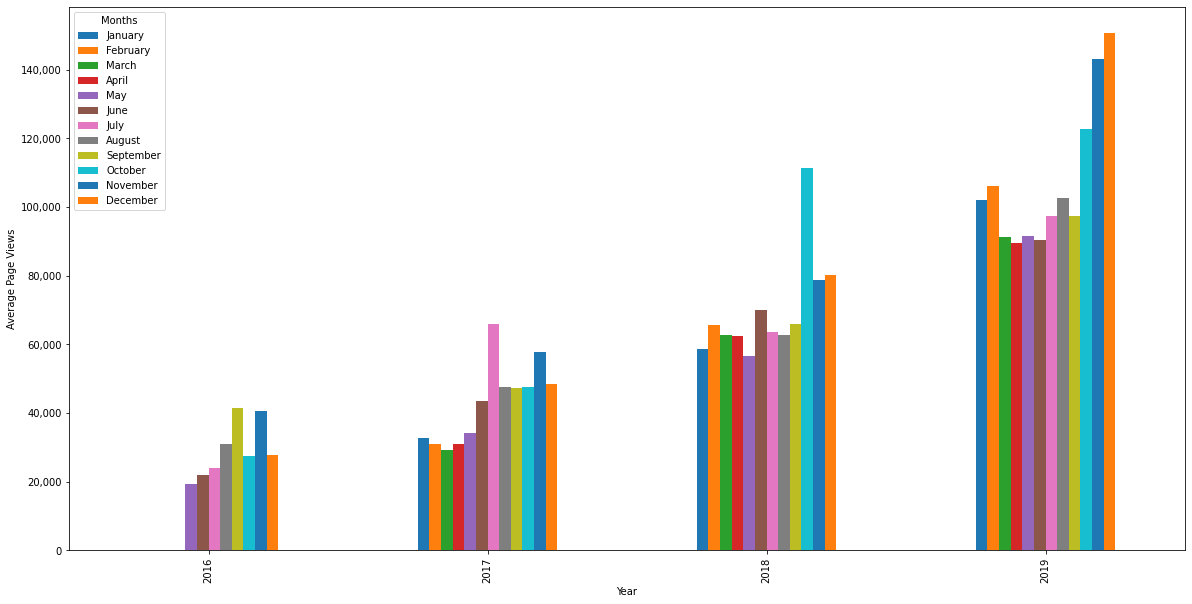

In [ ]:
# draw a bar plot showing average daily page views for each month grouped by year

plot2 = df_bar.plot(
    x='Year',
    kind='bar',
    stacked=False,
    xlabel = 'Year',
    ylabel = 'Average Page Views',
    figsize=(20,10))

plt.legend(loc='best', title="Months")

plot2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
# create two combined box pot showing how the values are distributed by year and month

# copy the data for box plot
df_box = df[['value']]
df_box.reset_index(inplace=True)

In [ ]:
# get year and month
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [ ]:
# sort data by month: jan, feb .. dec
df_box['mon_num'] = df_box['date'].dt.month

df_box = df_box.sort_values('mon_num')

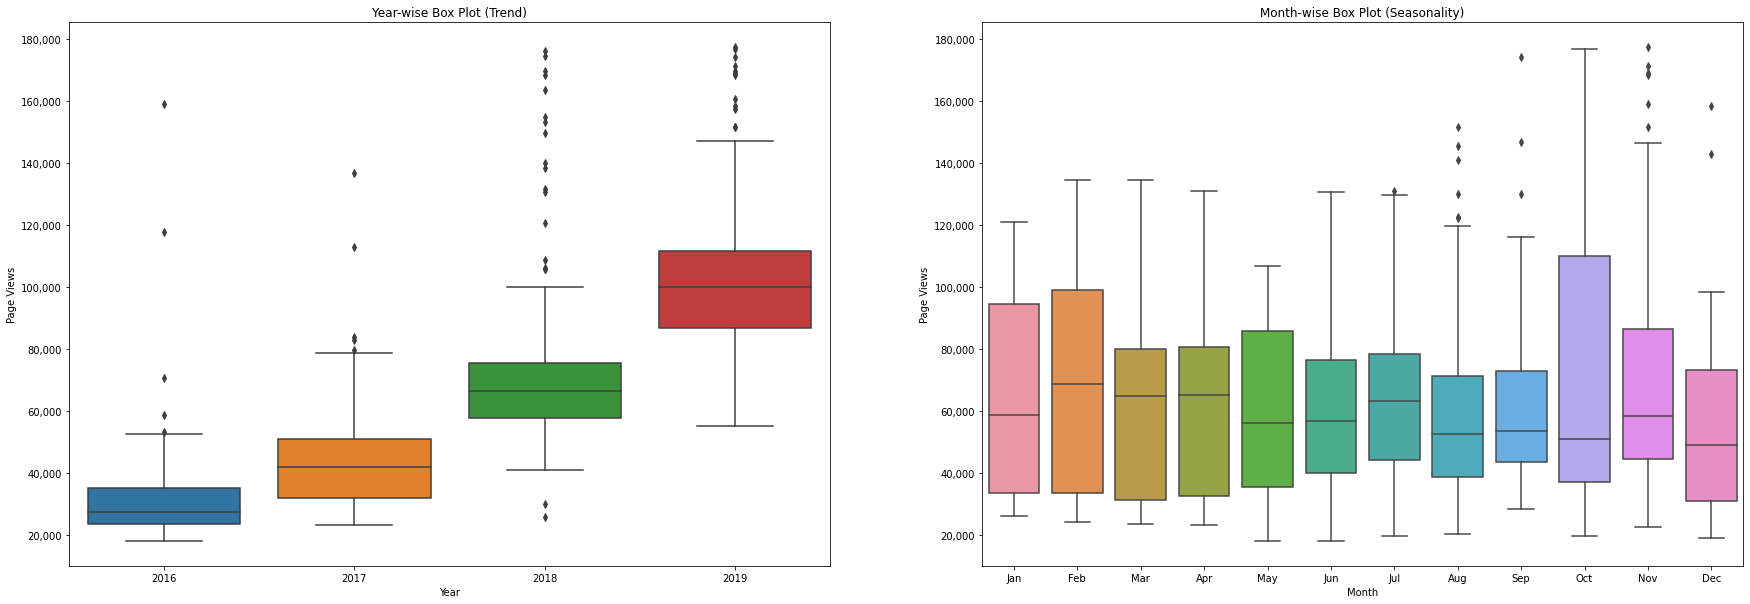

In [ ]:
# create two combined box pot showing how the values are distributed by year and month

fig3, plot3 = plt.subplots(figsize=(30,10), nrows=1, ncols=2)

plot3[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=plot3[0])
plot3[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=plot3[1])

plot3[0].set_title('Year-wise Box Plot (Trend)')
plot3[1].set_title('Month-wise Box Plot (Seasonality)')

plot3[0].set_xlabel('Year')
plot3[1].set_xlabel('Month')

plot3[0].set_ylabel('Page Views')
plot3[1].set_ylabel('Page Views')

plot3[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plot3[1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()